# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [51]:
!pip uninstall --yes matplotlib
!pip install -U matplotlib==2.0.2

Uninstalling matplotlib-2.0.2:
  Successfully uninstalled matplotlib-2.0.2
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/60/d4/6b6d8a7a6bc69a1602ab372f6fc6e88ef88a8a96398a1a25edbac636295b/matplotlib-2.0.2-cp36-cp36m-manylinux1_x86_64.whl
Requirement already up-to-date: cycler>=0.10 in /opt/conda/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg (from matplotlib==2.0.2)
Requirement already up-to-date: python-dateutil in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.0.2)
Requirement already up-to-date: pyparsing!=2.0.0,!=2.0.4,!=2.1.2,!=2.1.6,>=1.5.6 in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.0.2)
Requirement already up-to-date: pytz in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.0.2)
Requirement already up-to-date: six>=1.10 in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.0

In [52]:
data_dir = '/data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [53]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
# Note: because of a version problem with matplot lib, the following line of code doesn't work in this workspace.
# pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

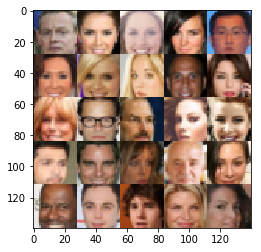

In [54]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [55]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [56]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name=('input_real'))
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [57]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.06
    keep_prob = 0.8
    
    with tf.variable_scope('discriminator', reuse=reuse) as scope:
        # Input layer is 28x28x3
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        x1 = tf.maximum(alpha * x1, x1)
        # 14x14x64

        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2,keep_prob=keep_prob)
        # 7x7x128
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3,keep_prob=keep_prob)
        # 4x4x256

        # Flatten it
        x4 = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(x4, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [59]:
def generator(z, out_channel_dim, is_train=True):
        
    alpha = 0.06
    keep_prob = 0.8
    
    # TODO: Implement Function
    
    with tf.variable_scope('generator',reuse=not is_train):
        x1 = tf.layers.dense(z,7*7*1024)
        
        #7x7x1024
        x1 = tf.reshape(x1,[-1,7,7,1024])
        x1 = tf.layers.batch_normalization(x1,training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        
        #7x7x512
        x2 = tf.layers.conv2d_transpose(x1,512,kernel_size=5,strides=1,padding='same')
        x2 = tf.layers.batch_normalization(x2,training=is_train)
        x2 = tf.maximum(alpha*x2, x2)
        x2 = tf.nn.dropout(x2,keep_prob=keep_prob)
        
        #14x14x256
        x3 = tf.layers.conv2d_transpose(x2,256,kernel_size=5,strides=2,padding='same')
        x3 = tf.layers.batch_normalization(x3,training=is_train)
        x3 = tf.maximum(alpha*x3, x3)
        x3 = tf.nn.dropout(x3,keep_prob=keep_prob)
        
        #14x14x128
        x4 = tf.layers.conv2d_transpose(x3,128,kernel_size=5,strides=1,padding='same')
        x4 = tf.layers.batch_normalization(x4,training=is_train)
        x4 = tf.maximum(alpha*x4, x4)
        x4 = tf.nn.dropout(x4,keep_prob=keep_prob)
        
        #28x28x64
        x5 = tf.layers.conv2d_transpose(x4,64,kernel_size=5,strides=2,padding='same')
        x5 = tf.layers.batch_normalization(x5,training=is_train)
        x5 = tf.maximum(alpha*x5, x5)
        x5 = tf.nn.dropout(x5,keep_prob=keep_prob)
        
        #28*28*3
        x6 = tf.layers.conv2d_transpose(x5,out_channel_dim,kernel_size=5,strides=1,padding='same')
        out = tf.nn.tanh(x6)
    return out

tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [60]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    alpha = 0.06
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [61]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [62]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [63]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
 
    # TODO: Build Model
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))

    samples, losses = [], []
    steps = 0
    print("_______________Train 1 _____________")
    print(data_shape)

    input_real, input_z, lr = model_inputs(data_shape[1],data_shape[2],data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    print("_______________Train 2 input real shape _____________")
    print(input_real)
    print("Training...")
    
    with tf.Session() as sess:
    
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
            
            # TODO: Train Model
                steps+=1
                print("___Batch Image ___")
                print(batch_images.shape)
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
            
                batch_images = batch_images * 2
            
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
            
            
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})
           
                print("____Run Session done____")
                print(steps)
                if steps % 100 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images })
                    train_loss_g = g_loss.eval({input_z: batch_z})
                
                    print('Epoch {}/{}...'.format(epoch_i+1, epoch_count),
                          'Discriminator loss: {:.4f}...'.format(train_loss_d),
                          'Generator loss: {:.4f}...'.format(train_loss_g))
                
                    losses.append((train_loss_d, train_loss_g))
                
            show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

_______________Train 1 _____________
(60000, 28, 28, 1)
_______________Train 2 input real shape _____________
Tensor("input_real:0", shape=(?, 28, 28, 1), dtype=float32)
Training...
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
4
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
5
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
6
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
7
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
8
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
9
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
10
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
11
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
12
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
13
___Batch

____Run Session done____
127
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
128
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
129
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
130
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
131
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
132
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
133
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
134
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
135
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
136
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
137
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
138
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
139
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
140
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
141
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
142
___Batch Im

____Run Session done____
254
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
255
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
256
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
257
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
258
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
259
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
260
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
261
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
262
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
263
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
264
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
265
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
266
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
267
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
268
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
269
___Batch Im

____Run Session done____
381
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
382
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
383
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
384
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
385
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
386
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
387
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
388
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
389
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
390
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
391
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
392
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
393
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
394
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
395
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
396
___Batch Im

____Run Session done____
507
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
508
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
509
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
510
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
511
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
512
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
513
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
514
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
515
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
516
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
517
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
518
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
519
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
520
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
521
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
522
___Batch Im

____Run Session done____
634
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
635
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
636
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
637
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
638
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
639
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
640
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
641
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
642
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
643
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
644
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
645
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
646
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
647
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
648
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
649
___Batch Im

____Run Session done____
761
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
762
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
763
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
764
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
765
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
766
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
767
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
768
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
769
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
770
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
771
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
772
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
773
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
774
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
775
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
776
___Batch Im

____Run Session done____
888
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
889
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
890
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
891
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
892
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
893
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
894
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
895
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
896
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
897
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
898
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
899
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
900
Epoch 1/2... Discriminator loss: 1.1813... Generator loss: 0.7642...
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
901
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
902
___Bat

____Run Session done____
1014
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1015
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1016
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1017
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1018
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1019
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1020
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1021
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1022
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1023
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1024
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1025
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1026
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1027
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1028
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
1139
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1140
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1141
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1142
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1143
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1144
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1145
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1146
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1147
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1148
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1149
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1150
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1151
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1152
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1153
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
1264
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1265
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1266
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1267
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1268
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1269
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1270
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1271
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1272
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1273
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1274
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1275
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1276
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1277
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1278
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
1389
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1390
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1391
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1392
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1393
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1394
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1395
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1396
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1397
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1398
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1399
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1400
Epoch 1/2... Discriminator loss: 1.4555... Generator loss: 1.1776...
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1401
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1402
___Batch Image ___
(32, 28, 28, 1)
____Run Session done_

____Run Session done____
1513
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1514
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1515
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1516
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1517
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1518
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1519
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1520
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1521
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1522
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1523
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1524
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1525
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1526
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1527
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
1638
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1639
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1640
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1641
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1642
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1643
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1644
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1645
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1646
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1647
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1648
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1649
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1650
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1651
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1652
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
1763
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1764
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1765
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1766
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1767
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1768
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1769
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1770
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1771
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1772
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1773
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1774
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1775
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1776
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1777
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


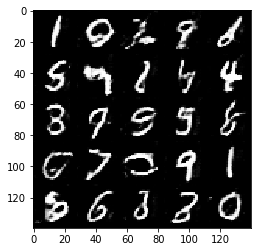

___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1876
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1877
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1878
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1879
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1880
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1881
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1882
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1883
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1884
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1885
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1886
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1887
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1888
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1889
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
1890
___Batch Image ___
(32, 2

____Run Session done____
2001
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2002
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2003
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2004
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2005
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2006
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2007
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2008
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2009
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2010
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2011
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2012
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2013
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2014
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2015
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
2126
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2127
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2128
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2129
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2130
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2131
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2132
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2133
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2134
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2135
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2136
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2137
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2138
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2139
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2140
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
2251
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2252
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2253
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2254
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2255
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2256
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2257
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2258
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2259
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2260
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2261
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2262
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2263
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2264
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2265
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
2376
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2377
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2378
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2379
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2380
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2381
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2382
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2383
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2384
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2385
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2386
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2387
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2388
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2389
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2390
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
2501
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2502
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2503
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2504
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2505
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2506
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2507
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2508
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2509
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2510
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2511
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2512
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2513
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2514
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2515
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
2626
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2627
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2628
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2629
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2630
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2631
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2632
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2633
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2634
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2635
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2636
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2637
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2638
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2639
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2640
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
2751
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2752
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2753
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2754
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2755
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2756
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2757
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2758
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2759
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2760
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2761
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2762
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2763
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2764
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2765
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
2876
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2877
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2878
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2879
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2880
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2881
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2882
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2883
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2884
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2885
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2886
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2887
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2888
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2889
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
2890
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
3001
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3002
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3003
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3004
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3005
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3006
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3007
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3008
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3009
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3010
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3011
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3012
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3013
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3014
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3015
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
3126
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3127
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3128
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3129
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3130
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3131
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3132
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3133
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3134
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3135
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3136
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3137
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3138
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3139
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3140
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
3251
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3252
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3253
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3254
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3255
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3256
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3257
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3258
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3259
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3260
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3261
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3262
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3263
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3264
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3265
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
3376
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3377
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3378
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3379
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3380
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3381
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3382
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3383
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3384
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3385
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3386
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3387
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3388
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3389
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3390
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
3501
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3502
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3503
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3504
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3505
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3506
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3507
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3508
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3509
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3510
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3511
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3512
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3513
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3514
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3515
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


____Run Session done____
3626
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3627
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3628
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3629
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3630
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3631
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3632
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3633
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3634
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3635
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3636
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3637
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3638
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3639
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____
3640
___Batch Image ___
(32, 28, 28, 1)
____Run Session done____


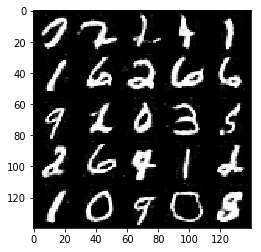

In [64]:
batch_size = 32
z_dim = 256
learning_rate = 0.0002
beta1 = 0.2 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

_______________Train 1 _____________
(202599, 28, 28, 3)
_______________Train 2 input real shape _____________
Tensor("input_real:0", shape=(?, 28, 28, 3), dtype=float32)
Training...
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
7
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
8
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
9
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
10
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
11
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
12
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
13
___Batc

____Run Session done____
127
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
128
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
129
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
130
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
131
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
132
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
133
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
134
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
135
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
136
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
137
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
138
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
139
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
140
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
141
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
142
___Batch Im

____Run Session done____
254
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
255
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
256
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
257
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
258
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
259
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
260
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
261
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
262
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
263
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
264
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
265
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
266
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
267
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
268
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
269
___Batch Im

____Run Session done____
381
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
382
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
383
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
384
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
385
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
386
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
387
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
388
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
389
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
390
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
391
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
392
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
393
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
394
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
395
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
396
___Batch Im

____Run Session done____
507
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
508
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
509
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
510
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
511
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
512
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
513
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
514
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
515
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
516
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
517
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
518
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
519
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
520
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
521
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
522
___Batch Im

____Run Session done____
634
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
635
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
636
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
637
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
638
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
639
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
640
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
641
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
642
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
643
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
644
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
645
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
646
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
647
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
648
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
649
___Batch Im

____Run Session done____
761
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
762
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
763
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
764
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
765
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
766
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
767
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
768
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
769
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
770
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
771
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
772
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
773
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
774
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
775
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
776
___Batch Im

____Run Session done____
888
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
889
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
890
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
891
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
892
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
893
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
894
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
895
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
896
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
897
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
898
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
899
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
900
Epoch 1/1... Discriminator loss: 1.2747... Generator loss: 0.5813...
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
901
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
902
___Bat

____Run Session done____
1014
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1015
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1016
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1017
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1018
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1019
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1020
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1021
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1022
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1023
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1024
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1025
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1026
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1027
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1028
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
1139
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1140
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1141
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1142
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1143
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1144
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1145
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1146
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1147
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1148
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1149
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1150
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1151
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1152
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1153
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
1264
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1265
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1266
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1267
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1268
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1269
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1270
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1271
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1272
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1273
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1274
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1275
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1276
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1277
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1278
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
1389
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1390
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1391
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1392
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1393
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1394
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1395
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1396
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1397
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1398
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1399
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1400
Epoch 1/1... Discriminator loss: 1.2655... Generator loss: 0.6605...
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1401
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1402
___Batch Image ___
(32, 28, 28, 3)
____Run Session done_

____Run Session done____
1513
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1514
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1515
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1516
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1517
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1518
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1519
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1520
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1521
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1522
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1523
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1524
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1525
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1526
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1527
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
1638
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1639
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1640
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1641
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1642
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1643
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1644
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1645
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1646
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1647
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1648
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1649
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1650
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1651
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1652
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
1763
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1764
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1765
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1766
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1767
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1768
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1769
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1770
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1771
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1772
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1773
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1774
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1775
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1776
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1777
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
1888
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1889
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1890
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1891
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1892
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1893
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1894
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1895
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1896
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1897
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1898
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1899
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1900
Epoch 1/1... Discriminator loss: 1.4053... Generator loss: 0.8032...
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
1901
___Batch Image ___
(32, 28, 28, 3)
____Run Session done_

____Run Session done____
2012
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2013
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2014
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2015
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2016
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2017
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2018
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2019
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2020
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2021
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2022
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2023
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2024
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2025
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2026
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
2137
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2138
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2139
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2140
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2141
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2142
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2143
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2144
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2145
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2146
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2147
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2148
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2149
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2150
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2151
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
2262
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2263
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2264
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2265
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2266
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2267
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2268
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2269
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2270
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2271
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2272
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2273
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2274
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2275
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2276
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
2387
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2388
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2389
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2390
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2391
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2392
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2393
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2394
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2395
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2396
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2397
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2398
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2399
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2400
Epoch 1/1... Discriminator loss: 1.2341... Generator loss: 0.8612...
___Batch Image ___
(32, 28, 28, 3)
____Run Session done_

____Run Session done____
2511
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2512
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2513
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2514
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2515
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2516
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2517
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2518
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2519
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2520
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2521
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2522
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2523
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2524
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2525
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
2636
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2637
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2638
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2639
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2640
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2641
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2642
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2643
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2644
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2645
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2646
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2647
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2648
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2649
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2650
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
2761
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2762
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2763
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2764
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2765
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2766
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2767
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2768
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2769
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2770
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2771
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2772
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2773
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2774
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2775
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
2886
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2887
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2888
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2889
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2890
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2891
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2892
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2893
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2894
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2895
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2896
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2897
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2898
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2899
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
2900
Epoch 1/1... Discriminator loss: 1.2373... Generator loss: 0

____Run Session done____
3010
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3011
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3012
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3013
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3014
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3015
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3016
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3017
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3018
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3019
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3020
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3021
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3022
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3023
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3024
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
3135
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3136
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3137
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3138
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3139
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3140
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3141
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3142
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3143
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3144
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3145
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3146
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3147
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3148
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3149
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
3260
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3261
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3262
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3263
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3264
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3265
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3266
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3267
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3268
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3269
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3270
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3271
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3272
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3273
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3274
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
3385
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3386
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3387
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3388
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3389
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3390
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3391
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3392
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3393
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3394
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3395
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3396
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3397
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3398
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3399
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
3509
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3510
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3511
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3512
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3513
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3514
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3515
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3516
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3517
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3518
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3519
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3520
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3521
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3522
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3523
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
3634
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3635
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3636
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3637
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3638
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3639
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3640
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3641
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3642
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3643
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3644
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3645
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3646
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3647
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3648
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
3759
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3760
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3761
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3762
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3763
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3764
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3765
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3766
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3767
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3768
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3769
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3770
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3771
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3772
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3773
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
3884
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3885
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3886
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3887
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3888
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3889
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3890
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3891
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3892
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3893
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3894
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3895
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3896
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3897
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
3898
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
4008
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4009
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4010
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4011
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4012
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4013
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4014
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4015
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4016
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4017
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4018
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4019
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4020
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4021
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4022
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
4133
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4134
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4135
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4136
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4137
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4138
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4139
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4140
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4141
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4142
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4143
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4144
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4145
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4146
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4147
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
4258
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4259
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4260
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4261
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4262
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4263
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4264
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4265
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4266
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4267
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4268
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4269
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4270
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4271
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4272
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
4383
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4384
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4385
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4386
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4387
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4388
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4389
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4390
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4391
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4392
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4393
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4394
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4395
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4396
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4397
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
4507
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4508
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4509
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4510
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4511
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4512
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4513
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4514
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4515
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4516
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4517
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4518
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4519
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4520
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4521
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
4632
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4633
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4634
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4635
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4636
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4637
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4638
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4639
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4640
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4641
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4642
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4643
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4644
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4645
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4646
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
4757
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4758
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4759
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4760
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4761
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4762
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4763
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4764
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4765
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4766
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4767
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4768
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4769
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4770
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4771
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
4882
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4883
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4884
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4885
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4886
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4887
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4888
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4889
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4890
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4891
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4892
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4893
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4894
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4895
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
4896
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
5006
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5007
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5008
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5009
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5010
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5011
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5012
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5013
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5014
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5015
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5016
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5017
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5018
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5019
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5020
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
5131
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5132
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5133
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5134
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5135
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5136
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5137
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5138
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5139
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5140
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5141
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5142
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5143
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5144
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5145
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
5256
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5257
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5258
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5259
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5260
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5261
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5262
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5263
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5264
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5265
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5266
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5267
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5268
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5269
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5270
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
5381
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5382
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5383
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5384
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5385
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5386
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5387
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5388
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5389
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5390
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5391
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5392
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5393
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5394
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5395
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
5505
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5506
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5507
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5508
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5509
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5510
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5511
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5512
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5513
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5514
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5515
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5516
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5517
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5518
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5519
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
5630
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5631
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5632
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5633
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5634
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5635
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5636
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5637
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5638
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5639
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5640
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5641
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5642
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5643
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5644
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
5755
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5756
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5757
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5758
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5759
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5760
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5761
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5762
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5763
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5764
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5765
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5766
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5767
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5768
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5769
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
5880
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5881
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5882
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5883
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5884
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5885
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5886
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5887
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5888
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5889
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5890
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5891
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5892
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5893
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
5894
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
6004
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6005
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6006
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6007
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6008
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6009
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6010
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6011
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6012
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6013
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6014
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6015
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6016
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6017
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6018
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
6129
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6130
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6131
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6132
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6133
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6134
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6135
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6136
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6137
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6138
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6139
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6140
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6141
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6142
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6143
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


____Run Session done____
6254
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6255
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6256
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6257
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6258
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6259
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6260
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6261
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6262
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6263
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6264
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6265
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6266
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6267
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____
6268
___Batch Image ___
(32, 28, 28, 3)
____Run Session done____


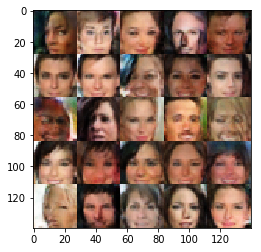

In [65]:
batch_size = 32
z_dim = 256
learning_rate = 0.0002
beta1 = 0.2 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.